In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
%matplotlib inline

<br><br><br>
# 36. 頻度上位10語Permalink
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [3]:
def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        surface, attr = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base' : attr[6],
            'pos' : attr[0],
            'pos1' : attr[1]
        }
        res.append(lineDict)

def sortWord(block):
    res = {}
    for b in block:
        if not b['surface'] in res:
            res[b['surface']] = 1
        else:
            res[b['surface']] += 1
    return sorted(res.items(), key=lambda x: x[1], reverse=True)



filename = '../data/neko.txt.mecab'
with open(filename, mode='r', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = parseMecab(blockList[0])
ans = sortWord(blockList)

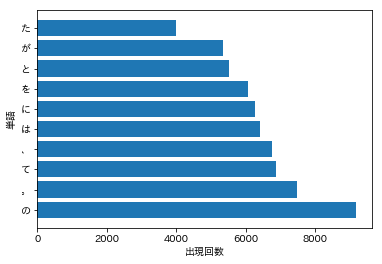

In [4]:
key = [ans[i][0] for i in range(10)]
val = [ans[i][1] for i in range(10)]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.barh(np.arange(len(key)), val, tick_label=key)
ax.set_ylabel('単語')
ax.set_xlabel('出現回数')
plt.show()

<br><br><br>
# 37. 「猫」と共起頻度の高い上位10語Permalink
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [5]:
def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        surface, attr = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base' : attr[6],
            'pos' : attr[0],
            'pos1' : attr[1]
        }
        res.append(lineDict)


filename = '../data/neko.txt.mecab'
with open(filename, mode='r', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = parseMecab(blockList[0])

In [7]:
def wordWithNeko(blockList):
    res = {}
    tf = False
    tmp = {}
    for b in blockList:
        if b['surface'] == '猫':
            if tf is False:
                tf = True
            else:
                tmp['猫'] += 1
        if b['surface'] == '。':
            if tf is True:
                for k, v in tmp.items():
                    if k in res:
                        res[k] += v
                    else:
                        res[k] = v
            tf, tmp = False, {}
        if b['surface'] in tmp:
            tmp[b['surface']] += 1
        else:
            tmp[b['surface']] = 1
            
    return sorted(res.items(), key=lambda x: x[1], reverse=True)
        
ans = wordWithNeko(blockList)
print(ans[:10])

[('の', 397), ('は', 284), ('猫', 277), ('、', 265), ('に', 251), ('を', 240), ('て', 236), ('。', 218), ('と', 210), ('が', 185)]


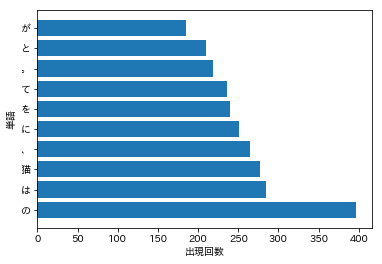

In [8]:
key = [ans[i][0] for i in range(10)]
val = [ans[i][1] for i in range(10)]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.barh(np.arange(len(key)), val, tick_label=key)
ax.set_ylabel('単語')
ax.set_xlabel('出現回数')
plt.show()

<br><br><br>
# 38. ヒストグラムPermalink
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [9]:
def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        surface, attr = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base' : attr[6],
            'pos' : attr[0],
            'pos1' : attr[1]
        }
        res.append(lineDict)

def sortWord(block):
    res = {}
    for b in block:
        if not b['surface'] in res:
            res[b['surface']] = 1
        else:
            res[b['surface']] += 1
    return sorted(res.items(), key=lambda x: x[1], reverse=True)



filename = '../data/neko.txt.mecab'
with open(filename, mode='r', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = parseMecab(blockList[0])
ans = sortWord(blockList)

(array([127., 117., 111., 102.,  91.,  79.,  59.,  53.,  60.,  48.,  48.,
         22.,  29.,  37.,  36.,  29.,  20.,  24.,  21.,  21.,  23.,  18.,
         23.,  14.,  11.,  19.,  19.,  14.,   9.,  13.,  11.,  13.,   7.,
          5.,  14.,  10.,   7.,   8.,   9.,   4.,   3.,   7.,   8.,   2.,
          1.,   9.,   6.,   6.,   2.,   4.,   6.,   4.,   4.,   7.,   3.,
          9.,   3.,   3.,   2.,   0.,   5.,   5.,   4.,   6.,   4.,   3.,
          2.,   1.,   1.,   2.,   3.,   1.,   3.,   3.,   4.,   3.,   3.,
          2.,   3.,   3.,   2.,   1.,   1.,   5.,   2.,   1.,   1.,   3.,
          5.]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
        27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
        44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
        78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
        95, 

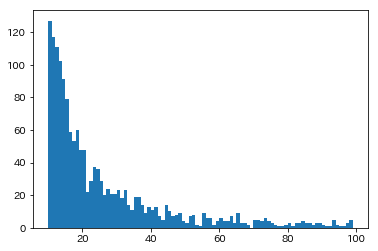

In [25]:
scores = [a[1] for a in ans]
plt.hist(scores, range(10, 100))

(0, 150)

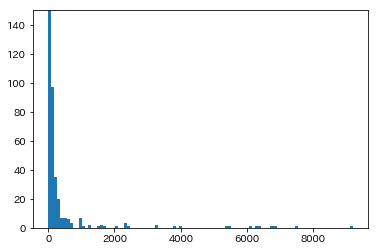

In [32]:
plt.hist(scores, bins=100)
plt.ylim(0, 150)

<br><br><br>
# 39. Zipfの法則Permalink
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

### Zipfの法則(https://bellcurve.jp/statistics/blog/14184.html)
Zipf はジップ、または、ジフと読みます。アメリカの言語学者のジョージ･キングズリー・ジフが発見した経験則です。サイズの大きさで順位（k）を付けた場合、k番目のサイズは、1番目のサイズの 1/k になるというものです。

In [34]:
def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':
            return res
        surface, attr = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base' : attr[6],
            'pos' : attr[0],
            'pos1' : attr[1]
        }
        res.append(lineDict)

def sortWord(block):
    res = {}
    for b in block:
        if not b['surface'] in res:
            res[b['surface']] = 1
        else:
            res[b['surface']] += 1
    return sorted(res.items(), key=lambda x: x[1], reverse=True)



filename = '../data/neko.txt.mecab'
with open(filename, mode='r', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = parseMecab(blockList[0])
ans = sortWord(blockList)

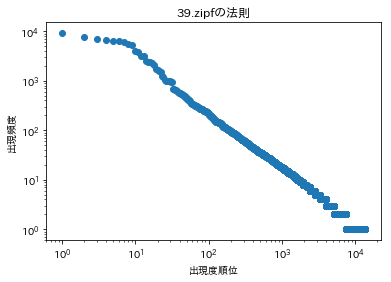

In [38]:
scores = [a[1] for a in ans]
plt.xscale('log')
plt.yscale('log')

x = range(1, len(scores)+1)
plt.scatter(x, scores)

plt.title("39.zipfの法則")
plt.xlabel('出現度順位')
plt.ylabel('出現頻度')

plt.show()